In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import sentiment

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/adilbek.karmanov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/adilbek.karmanov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
folder = 'files/'
df_with_sw = pd.read_csv(folder + 'clean_tweets_with_stopwords.csv')
df_without_sw = pd.read_csv(folder + 'clean_tweets_without_stopwords.csv')

### Sentiment analysis using TextBlob library

#### With stop-words

In [4]:
polarities = map(sentiment.getPolarity, list(df_with_sw['tweet']))
df_with_sw['textblob_sentiment'] = list(map(sentiment.getSentiment, polarities))

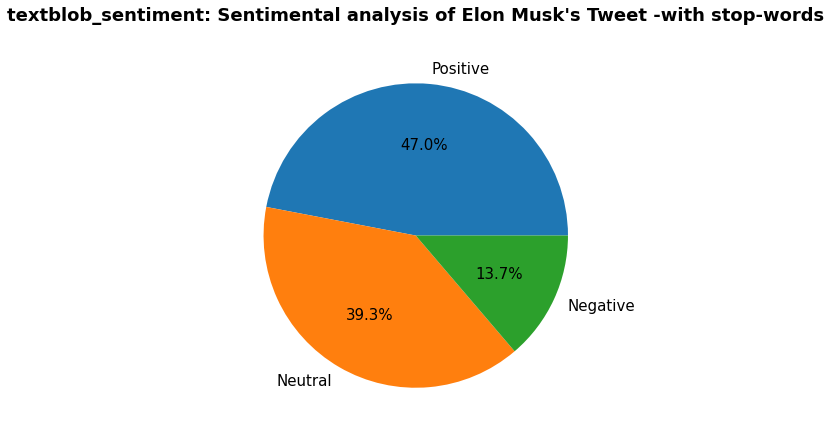

In [5]:
sentiment.show_semantic_pie(df_with_sw, 'textblob_sentiment', 'with stop-words')

In [6]:
sentiment.top_ten_words(list(df_with_sw['tweet']), list(df_with_sw['textblob_sentiment']))

,Cluster,Size,Common words,Counts
0,-1,1679,"[amp, tesla, erdayastronaut, boring, spacex, h...","[405, 277, 107, 89, 88, 81, 77, 76, 73, 70]"
1,0,4795,"[tesla, yes, amp, spacex, erdayastronaut, flcn...","[505, 395, 314, 243, 164, 149, 148, 114, 106, ..."
2,1,5739,"[amp, tesla, good, great, spacex, erdayastrona...","[1208, 1041, 472, 383, 368, 335, 280, 248, 247..."


#### Without stop-words

In [7]:
polarities = map(sentiment.getPolarity, list(df_without_sw['tweet']))
df_without_sw['textblob_sentiment'] = list(map(sentiment.getSentiment, polarities))

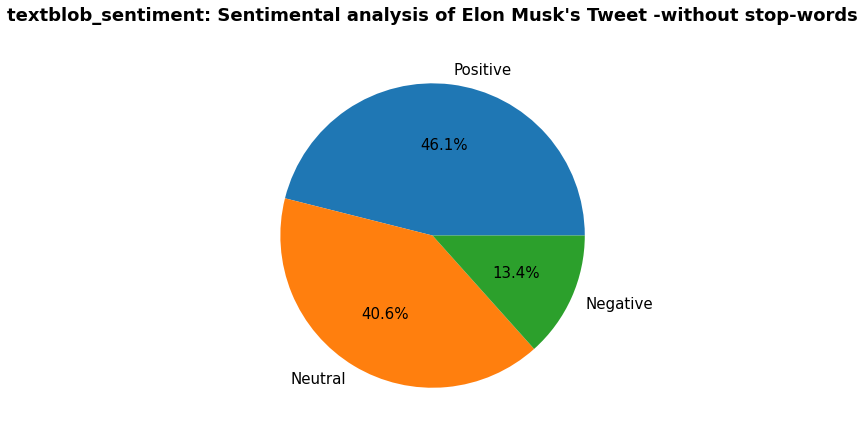

In [8]:
sentiment.show_semantic_pie(df_without_sw, 'textblob_sentiment', 'without stop-words')

In [9]:
sentiment.top_ten_words(list(df_without_sw['tweet']), list(df_without_sw['textblob_sentiment']))

,Cluster,Size,Common words,Counts
0,-1,1595,"[amp, tesla, boring, hard, like, would, long, ...","[401, 148, 89, 82, 69, 68, 60, 60, 59, 57]"
1,0,4836,"[yes, amp, tesla, model, 3, like, soon, 1, nex...","[407, 358, 284, 144, 131, 125, 119, 117, 113, ..."
2,1,5493,"[amp, tesla, good, great, much, true, would, h...","[1149, 621, 470, 381, 274, 234, 234, 233, 220,..."


### Sentiment analysis using BERTweet

In [10]:
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

emoji is not installed, thus not converting emoticons or emojis into text. Please install emoji: pip3 install emoji


#### With stop-words

In [11]:
sentiments = []
for tweet in list(df_with_sw['tweet']):
    sent = classifier(str(tweet))
    sentiments.append(sent[0]['label'])
df_with_sw['bertweet_sentiment'] = sentiments 

In [12]:
df_with_sw['bertweet_sentiment'] = df_with_sw['bertweet_sentiment'].replace('NEG', -1)
df_with_sw['bertweet_sentiment'] = df_with_sw['bertweet_sentiment'].replace('NEU', 0)
df_with_sw['bertweet_sentiment'] = df_with_sw['bertweet_sentiment'].replace('POS', 1)

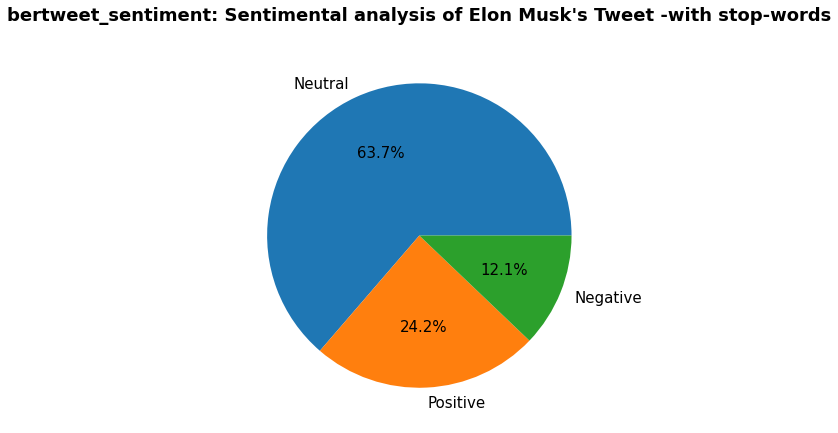

In [13]:
sentiment.show_semantic_pie(df_with_sw, 'bertweet_sentiment', 'with stop-words')

In [14]:
sentiment.top_ten_words(list(df_with_sw['tweet']), list(df_with_sw['bertweet_sentiment']))

,Cluster,Size,Common words,Counts
0,-1,1481,"[amp, tesla, people, would, like, even, high, ...","[300, 197, 78, 70, 58, 57, 56, 53, 53, 53]"
1,0,7776,"[amp, tesla, spacex, erdayastronaut, yes, flcn...","[1150, 958, 476, 467, 452, 323, 297, 223, 198,..."
2,1,2956,"[tesla, amp, good, great, spacex, thanks, mode...","[668, 477, 343, 324, 186, 161, 142, 128, 127, ..."


#### Without stop-words

In [15]:
sentiments = []
for tweet in list(df_without_sw['tweet']):
    sent = classifier(str(tweet))
    sentiments.append(sent[0]['label'])
df_without_sw['bertweet_sentiment'] = sentiments 

In [16]:
df_without_sw['bertweet_sentiment'] = df_without_sw['bertweet_sentiment'].replace('NEG', -1)
df_without_sw['bertweet_sentiment'] = df_without_sw['bertweet_sentiment'].replace('NEU', 0)
df_without_sw['bertweet_sentiment'] = df_without_sw['bertweet_sentiment'].replace('POS', 1)

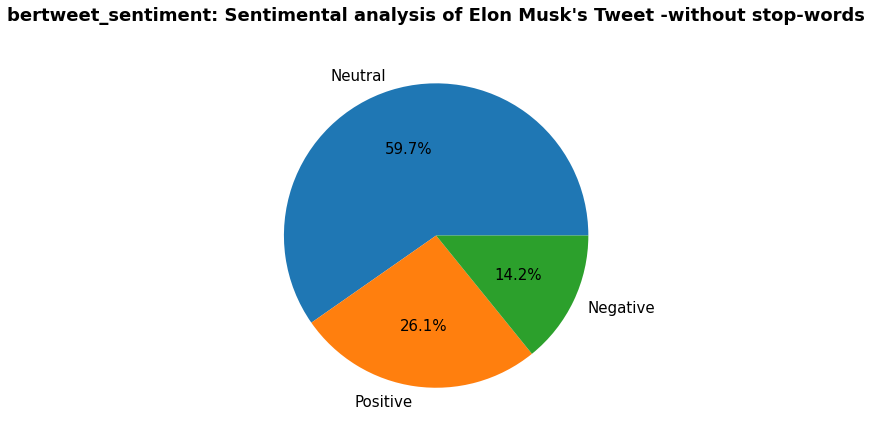

In [17]:
sentiment.show_semantic_pie(df_without_sw, 'bertweet_sentiment', 'without stop-words')

In [18]:
sentiment.top_ten_words(list(df_without_sw['tweet']), list(df_without_sw['bertweet_sentiment']))

,Cluster,Size,Common words,Counts
0,-1,1689,"[amp, tesla, people, dont, would, car, like, e...","[359, 152, 92, 76, 76, 69, 68, 65, 64, 60]"
1,0,7119,"[amp, tesla, yes, 3, model, like, 1, next, wou...","[1108, 547, 267, 262, 250, 225, 212, 189, 187,..."
2,1,3116,"[amp, tesla, good, great, yes, thanks, haha, t...","[441, 354, 343, 328, 269, 177, 129, 123, 118, ..."


### Sentiment analysis using DistilBERT (Huggingface)

In [19]:
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


#### With stop-words

In [20]:
sentiments = []
for tweet in list(df_with_sw['tweet']):
    sent = classifier(str(tweet))
    sentiments.append(sent[0]['label'])
df_with_sw['distilbert_sentiment'] = sentiments 

In [21]:
df_with_sw['distilbert_sentiment'] = df_with_sw['distilbert_sentiment'].replace('NEGATIVE', -1)
df_with_sw['distilbert_sentiment'] = df_with_sw['distilbert_sentiment'].replace('POSITIVE', 1)

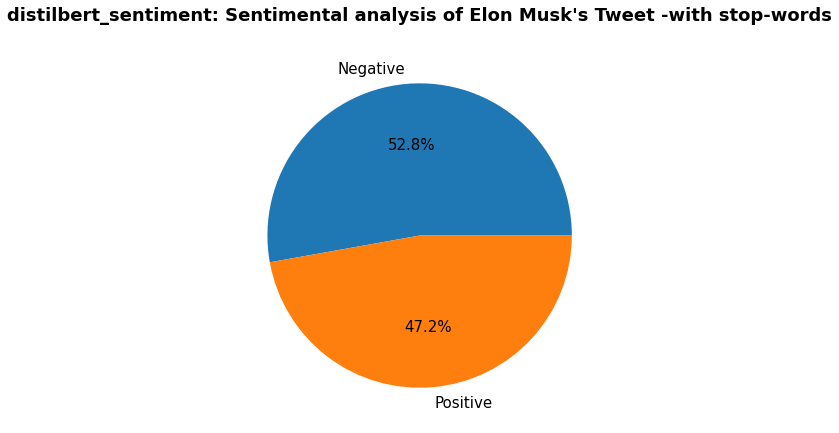

In [22]:
sentiment.show_semantic_pie(df_with_sw, 'distilbert_sentiment', 'with stop-words')

In [23]:
sentiment.top_ten_words(list(df_with_sw['tweet']), list(df_with_sw['distilbert_sentiment']))

,Cluster,Size,Common words,Counts
0,-1,6450,"[amp, tesla, erdayastronaut, spacex, flcnhvy, ...","[1308, 943, 420, 354, 273, 257, 252, 249, 210,..."
1,1,5763,"[tesla, amp, yes, good, spacex, great, model, ...","[880, 619, 422, 362, 345, 306, 217, 193, 186, ..."


#### Without stop-words

In [24]:
sentiments = []
for tweet in list(df_without_sw['tweet']):
    sent = classifier(str(tweet))
    sentiments.append(sent[0]['label'])
df_without_sw['distilbert_sentiment'] = sentiments 

In [25]:
df_without_sw['distilbert_sentiment'] = df_without_sw['distilbert_sentiment'].replace('NEGATIVE', -1)
df_without_sw['distilbert_sentiment'] = df_without_sw['distilbert_sentiment'].replace('POSITIVE', 1)

In [26]:
df_without_sw.columns

Index(['date', 'tweet', 'language', 'hashtags', 'cashtags', 'link', 'retweet',
       'nlikes', 'nreplies', 'nretweets', 'reply_to', 'textblob_sentiment',
       'bertweet_sentiment', 'distilbert_sentiment'],
      dtype='object')

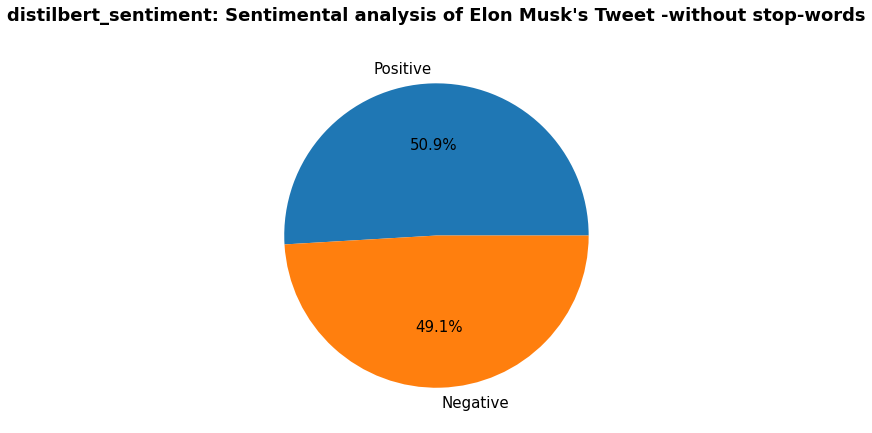

In [27]:
sentiment.show_semantic_pie(df_without_sw, 'distilbert_sentiment', 'without stop-words')

In [28]:
sentiment.top_ten_words(list(df_without_sw['tweet']), list(df_without_sw['distilbert_sentiment']))

,Cluster,Size,Common words,Counts
0,-1,5851,"[amp, tesla, would, like, 3, car, model, dont,...","[1434, 640, 267, 264, 249, 233, 229, 204, 198,..."
1,1,6073,"[amp, yes, tesla, good, great, thanks, model, ...","[474, 466, 413, 333, 293, 193, 175, 168, 157, ..."


In [ ]:
df_with_sw.to_csv('files/sentimented_tweets_with_stopwords.csv', index = False)
df_without_sw.to_csv('files/sentimented_tweets_without_stopwords.csv', index = False)